In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [34]:
df = pd.read_csv("../data/spotify_millsongdata.csv")

In [35]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [36]:
df.shape

(57650, 4)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [38]:
# check missing values
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [39]:
#top 50 artist and songs
top_artists = df['artist'].value_counts().head(50)
print("\nTop 50 Artist:")
print(top_artists)


Top 50 Artist:
artist
Donna Summer             191
Gordon Lightfoot         189
Bob Dylan                188
George Strait            188
Loretta Lynn             187
Alabama                  187
Cher                     187
Reba Mcentire            187
Chaka Khan               186
Dean Martin              186
Neil Young               185
Hank Williams Jr.        185
Nazareth                 184
Indigo Girls             184
America                  184
Cliff Richard            184
Johnny Cash              183
Kiss                     183
Chris Rea                182
Bon Jovi                 181
Fleetwood Mac            180
Dolly Parton             180
Deep Purple              179
Rolling Stones           179
The Beatles              178
Rod Stewart              178
Roy Orbison              178
Morrissey                177
James Taylor             177
Randy Travis             177
Iggy Pop                 177
Michael W. Smith         176
Michael Jackson          176
Elton John          

In [40]:
# all data sets use
df= df.drop('link',axis=1).reset_index(drop=True)

In [41]:
# most common words find use visualize
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800,height=400,background_color='white').generate(all_lyrics)

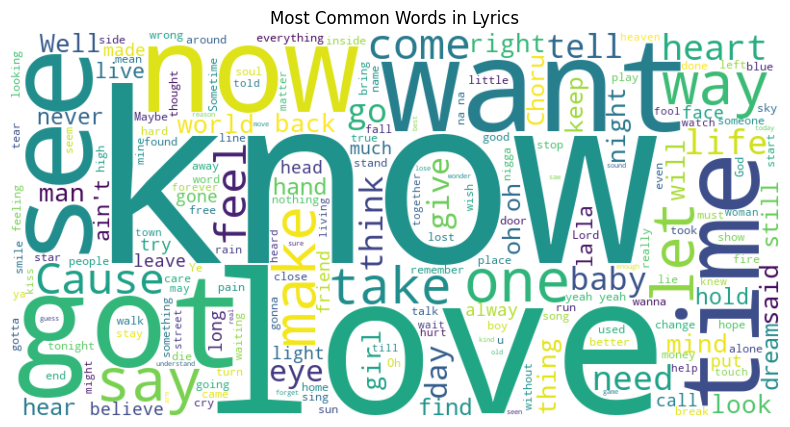

In [42]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Lyrics")
plt.show()

In [43]:
df.shape

(57650, 3)

In [44]:
df.head()

,artist,song,text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...


In [45]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Manikandan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Manikandan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manikandan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
stop_words = set(stopwords.words('english'))

In [47]:
def preprocess_text(text):
    #remove special character and numbers
    text = re.sub(r"[^a-zA-Z\s]","",text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [48]:
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [49]:
df.head()

,artist,song,text,cleaned_text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA...",look face wonderful face means something speci...
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen...",take easy please touch gently like summer even...
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...,ill never know go put lousy rotten show boy to...
3,ABBA,Bang,Making somebody happy is a question of give an...,making somebody happy question give take learn...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...,making somebody happy question give take learn...


In [50]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

import numpy as np
from sklearn.metrics.pairwise import linear_kernel
import heapq

def top_n_similarities(tfidf_matrix, top_n=5):
    top_similar = []
    
    for idx in range(tfidf_matrix.shape[0]):
        sims = linear_kernel(tfidf_matrix[idx:idx+1], tfidf_matrix).flatten()
        
        # Get top N similar indices (excluding self if needed)
        sims[idx] = -1  # exclude self if needed
        top_indices = heapq.nlargest(top_n, range(len(sims)), key=lambda i: sims[i])
        top_scores = [sims[i] for i in top_indices]
        
        top_similar.append(list(zip(top_indices, top_scores)))
    
    return top_similar


# Step 1: Get top N similarities
top_similarities = top_n_similarities(tfidf_matrix, top_n=5)

# Step 2: Access top similar docs for a given doc
doc_index = 42  # for example
similar_docs = top_similarities[doc_index]  # returns list of (index, score)

from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


from sklearn.metrics.pairwise import linear_kernel

# Compute full similarity matrix ONCE
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)  # Shape: (n_songs, n_songs)

# Fast top-N similarity lookup
def top_n_similarities_matrix(sim_matrix, top_n=5):
    top_similar = []
    for row in sim_matrix:
        row[np.argmax(row)] = -1  # ignore self match
        top_indices = np.argpartition(row, -top_n)[-top_n:]
        top_scores = row[top_indices]
        top_sorted = sorted(zip(top_indices, top_scores), key=lambda x: x[1], reverse=True)
        top_similar.append(top_sorted)
    return top_similar

top_similarities = top_n_similarities_matrix(cosine_sim, top_n=5)


In [52]:
from sklearn.neighbors import NearestNeighbors

# Fit NearestNeighbors model
nn_model = NearestNeighbors(n_neighbors=6, metric='cosine', algorithm='brute')
nn_model.fit(tfidf_matrix)

# Get top-N (excluding self at index 0)
distances, indices = nn_model.kneighbors(tfidf_matrix)

# Convert to similarities
top_similarities = []
for idx, (dist, ind) in enumerate(zip(distances, indices)):
    # exclude self (first index)
    pairs = list(zip(ind[1:], 1 - dist[1:]))  # cosine distance → similarity
    top_similarities.append(pairs)


In [70]:
def recommended_songs(song_name, df, top_n=10):
    # Compute the similarity matrix inside the function (only once)
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)  # Recompute the similarity matrix
    
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song Not Found! Please try another one"
    idx = idx[0]
    
    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]  # Exclude self similarity

    # Get the song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return df[['artist', 'song']].iloc[song_indices].reset_index(drop=True)


In [71]:
df['song'][2]

'As Good As New'

In [72]:
# example recommandation
print("\nRecommendeation for the song 'Blinded by Rainbows:")
recommendations = recommended_songs("As Good As New",df) # df['song][2]
print(recommendations)


Recommendeation for the song 'Blinded by Rainbows:


MemoryError: Unable to allocate 23.5 GiB for an array with shape (3157998606,) and data type int64